In [4]:
from mindsdb_native import MySqlDS

C:\Users\Simran\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


S3 Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Microsoft SQL Server Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Athena Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]
Google Cloud Storage Datasource is not available by default. If you wish to use it, please install mindsdb_native[extra_data_sources]


pip3 install mindsdb_native --upgrade



In [5]:
# mysql data source
mysql_ds = MySqlDS(query="SELECT * FROM covid_flu_data", user="root", password="pass", database="world", port=3306)

In [6]:
covid_data=mysql_ds[mysql_ds.columns[:20]]
covid_target=mysql_ds[mysql_ds.columns[20]]

In [14]:
""""
To-do
[*] Add models for binary classification 
[*] Take multiple readings and compute the average result
[*] Add time stats (Build time)
[*] Create a table with model_name, predicition
[*] Write a function to plot using matplotlib
"""
import mysql.connector
import pandas as pd
# Import the ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,PassiveAggressiveRegressor,LinearRegression,ARDRegression,HuberRegressor,ElasticNetCV,OrthogonalMatchingPursuit,ElasticNet,RidgeClassifier,RidgeCV,SGDClassifier,BayesianRidge, Perceptron,RANSACRegressor,LassoLars,Lasso,LassoCV,PassiveAggressiveClassifier
from sklearn.metrics import balanced_accuracy_score,accuracy_score,mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier,AdaBoostClassifier
import numpy as np
import time
import matplotlib.pyplot as plt


#function defs:
def model_testing(model):
    start = time.time()
    #Split the data using test_train_split
    x_train,x_test,y_train,y_test = train_test_split(covid_data,covid_target,test_size=0.5)
    #Fit the model using the data which was splitted
    model.fit(x_train,y_train)
    #Print Score of the model
    score = model.score(x_test,y_test)
    stop = time.time()
    timetaken = stop-start
    return (score,timetaken)
    #print(y_pred)
    
def plotGraph(keys, values, label, title):
    names = keys
    y_pos = np.arange(len(keys))
    data = values
    #plt.rcParams["figure.figsize"] = (15,7)
    plt.barh(y_pos, data, align='center', alpha=0.6)
    plt.yticks(y_pos, names)
    plt.xlabel(label)
    plt.title(title)
    plt.show()
    

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
#get the models
model_dict = {
    #"VotingClassifier": VotingClassifier(estimators=[('mnb',MultinomialNB()),('lr',LogisticRegression(max_iter=1000)),('rf',RandomForestClassifier()),('svm',LinearSVC(max_iter=1000))],voting='hard'),
    #"RandomForest": RandomForestClassifier(n_estimators=30, max_depth=9),
    #"AdaBoostClassifier": AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6),
    #"BaggingClassifier": BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10),
    #"DecisionTreeClassifier" : DecisionTreeClassifier(),
    #"LinearSVC" : LinearSVC(C=0.0001),
    "KNN": KNeighborsClassifier(n_neighbors = 7),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=30, max_depth=9),
    "AdaBoostClassifier": AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "LinearSVC" : LinearSVC(C = 1),
    "MultinomialNB": MultinomialNB(),
    #"ARDRegression": ARDRegression(),
    #"LogisticRegressionCV": LogisticRegressionCV(n_jobs=-1,max_iter=1000),
    #"ElasticNetCV": ElasticNetCV(alphas=alphas, cv=5),
    #"ElasticNet": ElasticNet(alpha=0.01),
    #"BayesianRidge": BayesianRidge(),
    #"RANSACRegressor": RANSACRegressor(base_estimator = LinearRegression(),min_samples=10,residual_threshold=5, random_state=0),
    #"LassoLars": LassoLars(alpha=0.1, fit_intercept=True,fit_path=False, max_iter=5000, normalize=True),
    #"RidgeClassifier":RidgeClassifier(),
    #"RidgeCV": RidgeCV(),
    #"Lasso": Lasso(),
    #"LassoCV": LassoCV(cv=5),
    #"PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    #"HuberRegressor": HuberRegressor(max_iter=2000),
    #"Perceptron": Perceptron(),
    #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(C=1, fit_intercept=False,random_state=0, average=True, max_iter=100)
}

model_stats_score = {}
model_stats_timetaken = {}
for modelname in model_dict:
    #print(modelname)
    preds = []
    timetaken = []
    for i in range(0,20):
        model = model_dict[modelname]
        score,timeforfit=model_testing(model)
        timetaken.append(timeforfit)
        preds.append(score)
    prediction_mean = (sum(preds)/len(preds))
    model_stats_score[modelname] = prediction_mean
    timetaken_mean =  (sum(timetaken)/len(timetaken))
    model_stats_timetaken[modelname] = timetaken_mean
    print("average for {} : {} and time taken: {}".format(modelname,prediction_mean,timetaken_mean))


average for KNN : 0.9199869528051469 and time taken: 16.352940785884858
average for LogisticRegression : 0.9306789040356325 and time taken: 1.1481000781059265
average for RandomForest : 0.9229608134251134 and time taken: 0.5642763376235962
average for AdaBoostClassifier : 0.9280897107121969 and time taken: 0.688911247253418
average for DecisionTreeClassifier : 0.9004858955324604 and time taken: 0.09877587556838989
average for LinearSVC : 0.9266162775003373 and time taken: 0.35000953674316404
average for MultinomialNB : 0.9241170648310613 and time taken: 0.12423809766769409


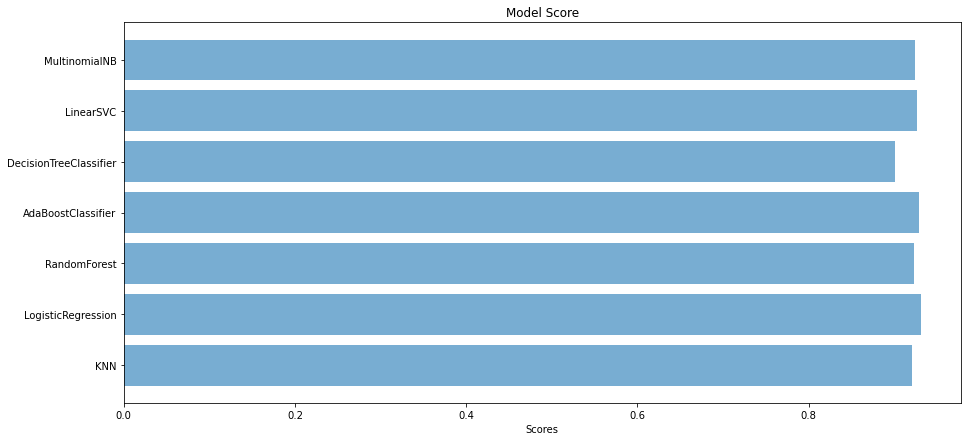

In [15]:
plotGraph(model_stats_score.keys(), model_stats_score.values(), 'Scores', 'Model Score')

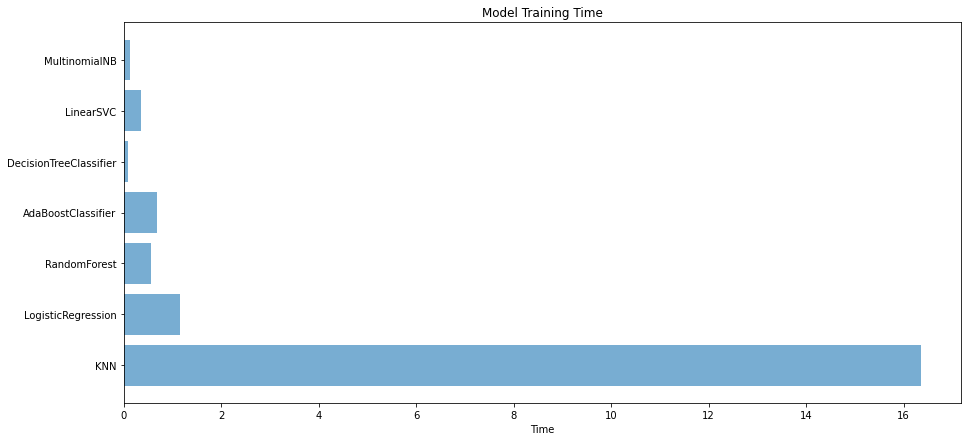

In [16]:
plotGraph(model_stats_timetaken.keys(), model_stats_timetaken.values(), 'Time', 'Model Training Time')

In [17]:
from tabulate import tabulate
headers = ['Model Name','Model Score', 'Model Training Time']
modelnames = list(model_stats_timetaken.keys())
modeltimes = list(model_stats_timetaken.values())
table = []
modescores = list(model_stats_score.values())
for i in range(0,len(modelnames)-1):
    table.append ([modelnames[i],modescores[i],modeltimes[i]])
print(tabulate(table, headers, tablefmt="github"))

| Model Name             |   Model Score |   Model Training Time |
|------------------------|---------------|-----------------------|
| KNN                    |      0.919987 |            16.3529    |
| LogisticRegression     |      0.930679 |             1.1481    |
| RandomForest           |      0.922961 |             0.564276  |
| AdaBoostClassifier     |      0.92809  |             0.688911  |
| DecisionTreeClassifier |      0.900486 |             0.0987759 |
| LinearSVC              |      0.926616 |             0.35001   |
